In [7]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def norm_res(predicted, observed, errors):
    res = observed-predicted
    return res / errors 

def chi_2(predicted, observed, errors):
    return np.sum(((observed-predicted) / errors) ** 2)

def red_chi_2(predicted, observed, errors, DoF):
    return np.sum(((observed-predicted) / errors) ** 2) / DoF


In [2]:
incident = np.array([0.0, 10.1, 20.0, 30.2, 39.9, 49.7, 59.8, 70.0, 80.0])
reflected = np.array([0.2, 9.9, 19.9, 30.3, 40.0, 50.1, 60.0, 70.1, 80.3])


In [3]:
def f_lin(x, m, b):
    return m * x + b

In [5]:
# Does the fit
init_params=[0, 0]
lin_opt, lin_cov = opt.curve_fit(f_lin, incident, reflected, p0=init_params)

# Best fit values
m, b = lin_opt
dm, db = np.sqrt(np.diag(lin_cov))

In [9]:
chi_2 = red_chi_2(f_lin(incident, m, b), reflected, .5, len(incident) - 2)

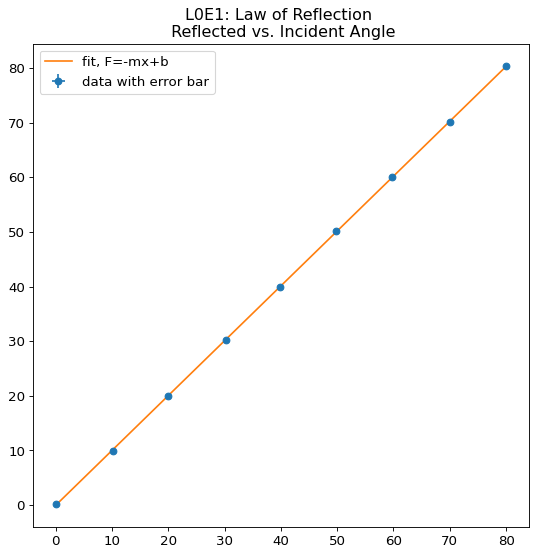

In [16]:
fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.errorbar(incident, reflected, yerr=.05, xerr=.05, label="data with error bar", fmt='o')
x_space = np.linspace(incident[0],incident[-1])
plt.plot(x_space, f_lin(x_space, m, b), label='fit, F=-mx+b', color='tab:orange')
plt.title("L0E1: Law of Reflection \n Reflected vs. Incident Angle")

plt.legend()
plt.show()

In [11]:
m

1.0036589704114183

In [12]:
b

-0.024014626307649493

In [14]:
chi_2

0.11174060916016362